# Нелинейный метод наименьших квадратов

Нелинейным методом наименьших квадратов построить модели вида
$$
y = \beta_1 e^{-\beta_2 x}
\qquad
\mbox{и}
\qquad
y = \beta_1 e^{\frac{\beta_2}{x+\beta_3}}
$$ 
для данных, приведенных в таблице
```
  x         y    
----------------                
 50       34804    
 55       28610    
 60       23650    
 65       19630    
 70       16370    
 75       13720    
 80       11540    
 85        9744    
 90        8261    
 95        7030    
100        6005    
105        5147    
110        4427    
115        3820    
120        3307    
125        2872    
```   
Найти общую ошибку в каждом из этих случаев и сравнить результаты.

Я заменил значение с 347804 на 34804, так как посчитал, что произошла опечатка

## Метод наименьших квадратов
Метод наименьших квадратов (МНК) — математический метод, применяемый для решения различных задач.Он может использоваться для поиска решения в случае обычных нелинейных систем уравнений, для аппроксимации точечных значений некоторой функции. Метод основан на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. 
А именно, ищем $\beta_0$, $\beta_1$, на которых достигается минимум суммы квадратов невязок (*остаточной суммы квадратов*)
$$
R(\beta_0,\, \beta_1) = \sum_{i=1}^m \bigl(y_i - \beta_0 - \beta_1 x_i\bigr)^2 \to \min_{\beta_0,\, \beta_1} 
$$

# Решение

In [91]:
#Подключаем нужгые библиотеки и процедуру
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import math as math
from scipy.optimize import curve_fit

In [92]:
#Задаём исходные данные
x = np.array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([34804, 28610, 23650, 19630, 16370, 13720, 11540, 9744, 8261, 7030, 6005, 5147, 4427, 3820, 3307, 2872])

$$
y = \beta_1 e^{-\beta_2 x}
\qquad
$$

In [93]:
#Функция для построения графика
def function1(x, b1, b2):
    return b1 * (math.e ** (-b2 * x))

Для нахождения коофицентов $\beta_1$ и $\beta_2$ будем использовать модуль scipy.optimize, а именно процедуру curve_fit.

E:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Коофиценты function1 [b1, b2] =  [1. 1.]


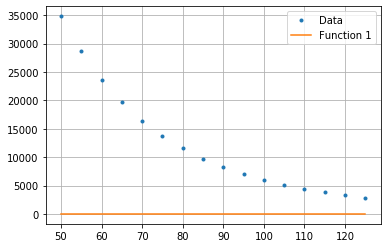

In [94]:
сoefficients_1, _ = curve_fit(function1, x, y)
print ("Коофиценты function1 [b1, b2] = ", сoefficients_1)
plt.plot(x, y, '.', label = 'Data')
plt.plot(x, function1(x, *сoefficients_1), label = 'Function 1')
plt.legend()
plt.grid()

Происходит ошибка. Тогда подставим приблизительные коофиценты в curve_fit
$$
\beta_1 ≈ 12.04553301
$$
$$
\beta_2 ≈ −0.03318
$$

Теперь можно построить график

Коофиценты function1 [b1, b2] =  [2.02261410e+05 3.55594766e-02]


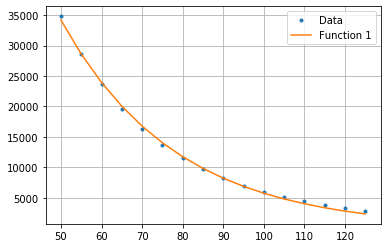

In [95]:
newсoefficients1 = [12.04553301, -0.03318]
сoefficients_1, _ = curve_fit(function1, x, y, newсoefficients)
print ("Коофиценты function1 [b1, b2] = ", сoefficients_1)
plt.plot(x, y, '.', label = 'Data')
plt.plot(x, function1(x, *сoefficients_1), label = 'Function 1')
plt.legend()
plt.grid()

Найдём ошибку по формуле:
$$
\frac{1}{n}\sum_{i=1}^{n} \left(f_i(\beta, x_i) - y_i \strut\right)^2
$$

In [96]:
(np.sum(function1(x, *сoefficients_1) - sum(y))**2)/16

557025940594.5576

Теперь проделываем те же самые действия для 
$$
y = \beta_1 e^{\frac{\beta_2}{x+\beta_3}}
$$

In [97]:
def function2(x, b1, b2, b3):
    return b1 * (math.e ** (b2/(x+b3)))

$$
\beta_1 ≈ 1
$$
$$
\beta_2 ≈ 9.94056164616192e+28
$$
$$
\beta_3 ≈ 91841.6246252477
$$

In [98]:
newсoefficients2 = [1, 9.94056164616192e+28, 91841.6246252477]
сoefficients_2, _ = curve_fit(function2, x, y)
print ("Коофиценты function2 [b1, b2, b3] = ", сoefficients_2)
plt.plot(x, y, '.', label = 'Data')
plt.plot(x, function2(x, *сoefficients_2), label = 'Function 2')
plt.legend()
plt.grid()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Сново ошибка. Попробуем добавить колличество операций

Коофиценты function2 [b1, b2, b3] =  [6.24484526e-03 6.08987471e+03 3.42051184e+02]


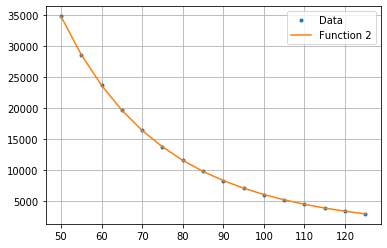

In [99]:
сoefficients_2, _ = curve_fit(function2, x, y, maxfev = 17500)
print ("Коофиценты function2 [b1, b2, b3] = ", сoefficients_2)
plt.plot(x, y, '.', label = 'Data')
plt.plot(x, function2(x, *сoefficients_2), label = 'Function 2')
plt.legend()
plt.grid()

Как оказалось, здесь в curve_fit можно не вставлять приближенные коофиценты.
Находим ошибку.

In [100]:
(np.sum(function2(x, *сoefficients_2) - sum(y))**2)/16

556536144204.9083

# ВЫВОД
Вторая функция точнее первой для приведённых данных, потому что:
1. Ошибка первой функции (557025940594.5576) > ошибка второй функции (556536144204.9083)
2. Модель второй функции более приближен к исходным данным, чем вторая модель